In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
#store = pd.HDFStore('X_pca.h5')
#X_pca = store['X_pca']

store = pd.HDFStore('X_pca.h5')
X_pca = store['X_pca']

store = pd.HDFStore('X_mob.h5')
X_mob = store['X_mob']


store = pd.HDFStore('y_default.h5')
y_default = store['y_default']

store = pd.HDFStore('y_prepay.h5')
y_prepay = store['y_prepay']

X_pca = X_pca.join(X_mob)

In [3]:
X_pca_add = X_pca[ X_pca['mob']>4].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/2)
X_pca = pd.concat([X_pca, X_pca_add])

zeros = pd.DataFrame(np.zeros(X_pca_add.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [4]:
X_pca_add = X_pca[ X_pca['mob']>4].copy()
X_pca_add['mob'] = np.ceil(X_pca_add['mob']/4*3)
X_pca = pd.concat([X_pca, X_pca_add])

zeros = pd.DataFrame(np.zeros(X_pca_add.shape[0]))
y_default = pd.concat([y_default,zeros])
y_prepay = pd.concat([y_prepay,zeros])

In [5]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_default, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.13974064
Iteration 2, loss = 0.13834603
Iteration 3, loss = 0.13814135
Iteration 4, loss = 0.13794175
Iteration 5, loss = 0.13786408
Iteration 6, loss = 0.13779655
Iteration 7, loss = 0.13771829
Iteration 8, loss = 0.13766196
Iteration 9, loss = 0.13759690
Iteration 10, loss = 0.13756945
Iteration 11, loss = 0.13749199
Iteration 12, loss = 0.13749453
Iteration 13, loss = 0.13748830
Iteration 14, loss = 0.13747498
Iteration 15, loss = 0.13741635
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.741


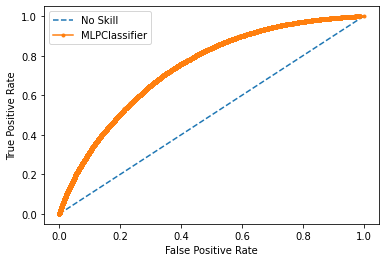

1246.8505008220673 s


In [6]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=15, early_stopping=False, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

# save the model to disk
filename = 'nn_model_default.sav'
#filename = 'nn_model_date_default.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")

In [7]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_prepay, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.31630334
Iteration 2, loss = 0.31282510
Iteration 3, loss = 0.31165791
Iteration 4, loss = 0.31001555
Iteration 5, loss = 0.30908857
Iteration 6, loss = 0.30825011
Iteration 7, loss = 0.30803779
Iteration 8, loss = 0.30779125
Iteration 9, loss = 0.30738852
Iteration 10, loss = 0.30731537
Iteration 11, loss = 0.30697258
Iteration 12, loss = 0.30683358
Iteration 13, loss = 0.30685604
Iteration 14, loss = 0.30654144
Iteration 15, loss = 0.30637895


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.672


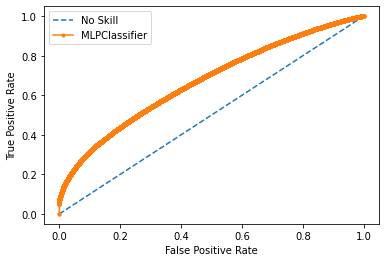

1172.910980463028 s


In [8]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=15, early_stopping=False, learning_rate_init=0.001, verbose=True)
model.fit(trainX, trainy)

time_end = time.time()

filename = 'nn_model_prepay.sav'
#filename = 'nn_model_date_prepay.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLPClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")